<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="https://raw.githubusercontent.com/DataForScience/DeepLearning/master/data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>Deep Learning From Scratch</h1>
<h1>Linear Regression</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import watermark

%load_ext watermark
%matplotlib inline

In [2]:
%watermark -i -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.10.9
IPython version      : 8.10.0

Compiler    : Clang 14.0.6 
OS          : Darwin
Release     : 22.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 03a6cf9c5faed1d6e551b54357ff497cfa569fb9

watermark : 2.4.2
numpy     : 1.23.5
matplotlib: 3.7.0



In [3]:
plt.style.use('d4sci.mplstyle')

## Load dataset

In [4]:
data = np.array(np.loadtxt("data/Anscombe1.dat"))

In [5]:
print(data)

[[10.    8.04]
 [ 8.    6.95]
 [13.    7.58]
 [ 9.    8.81]
 [11.    8.33]
 [14.    9.96]
 [ 6.    7.24]
 [ 4.    4.26]
 [12.   10.84]
 [ 7.    4.82]
 [ 5.    5.68]]


In [6]:
X = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)

In [7]:
X

array([[10.],
       [ 8.],
       [13.],
       [ 9.],
       [11.],
       [14.],
       [ 6.],
       [ 4.],
       [12.],
       [ 7.],
       [ 5.]])

In [8]:
y

array([[ 8.04],
       [ 6.95],
       [ 7.58],
       [ 8.81],
       [ 8.33],
       [ 9.96],
       [ 7.24],
       [ 4.26],
       [10.84],
       [ 4.82],
       [ 5.68]])

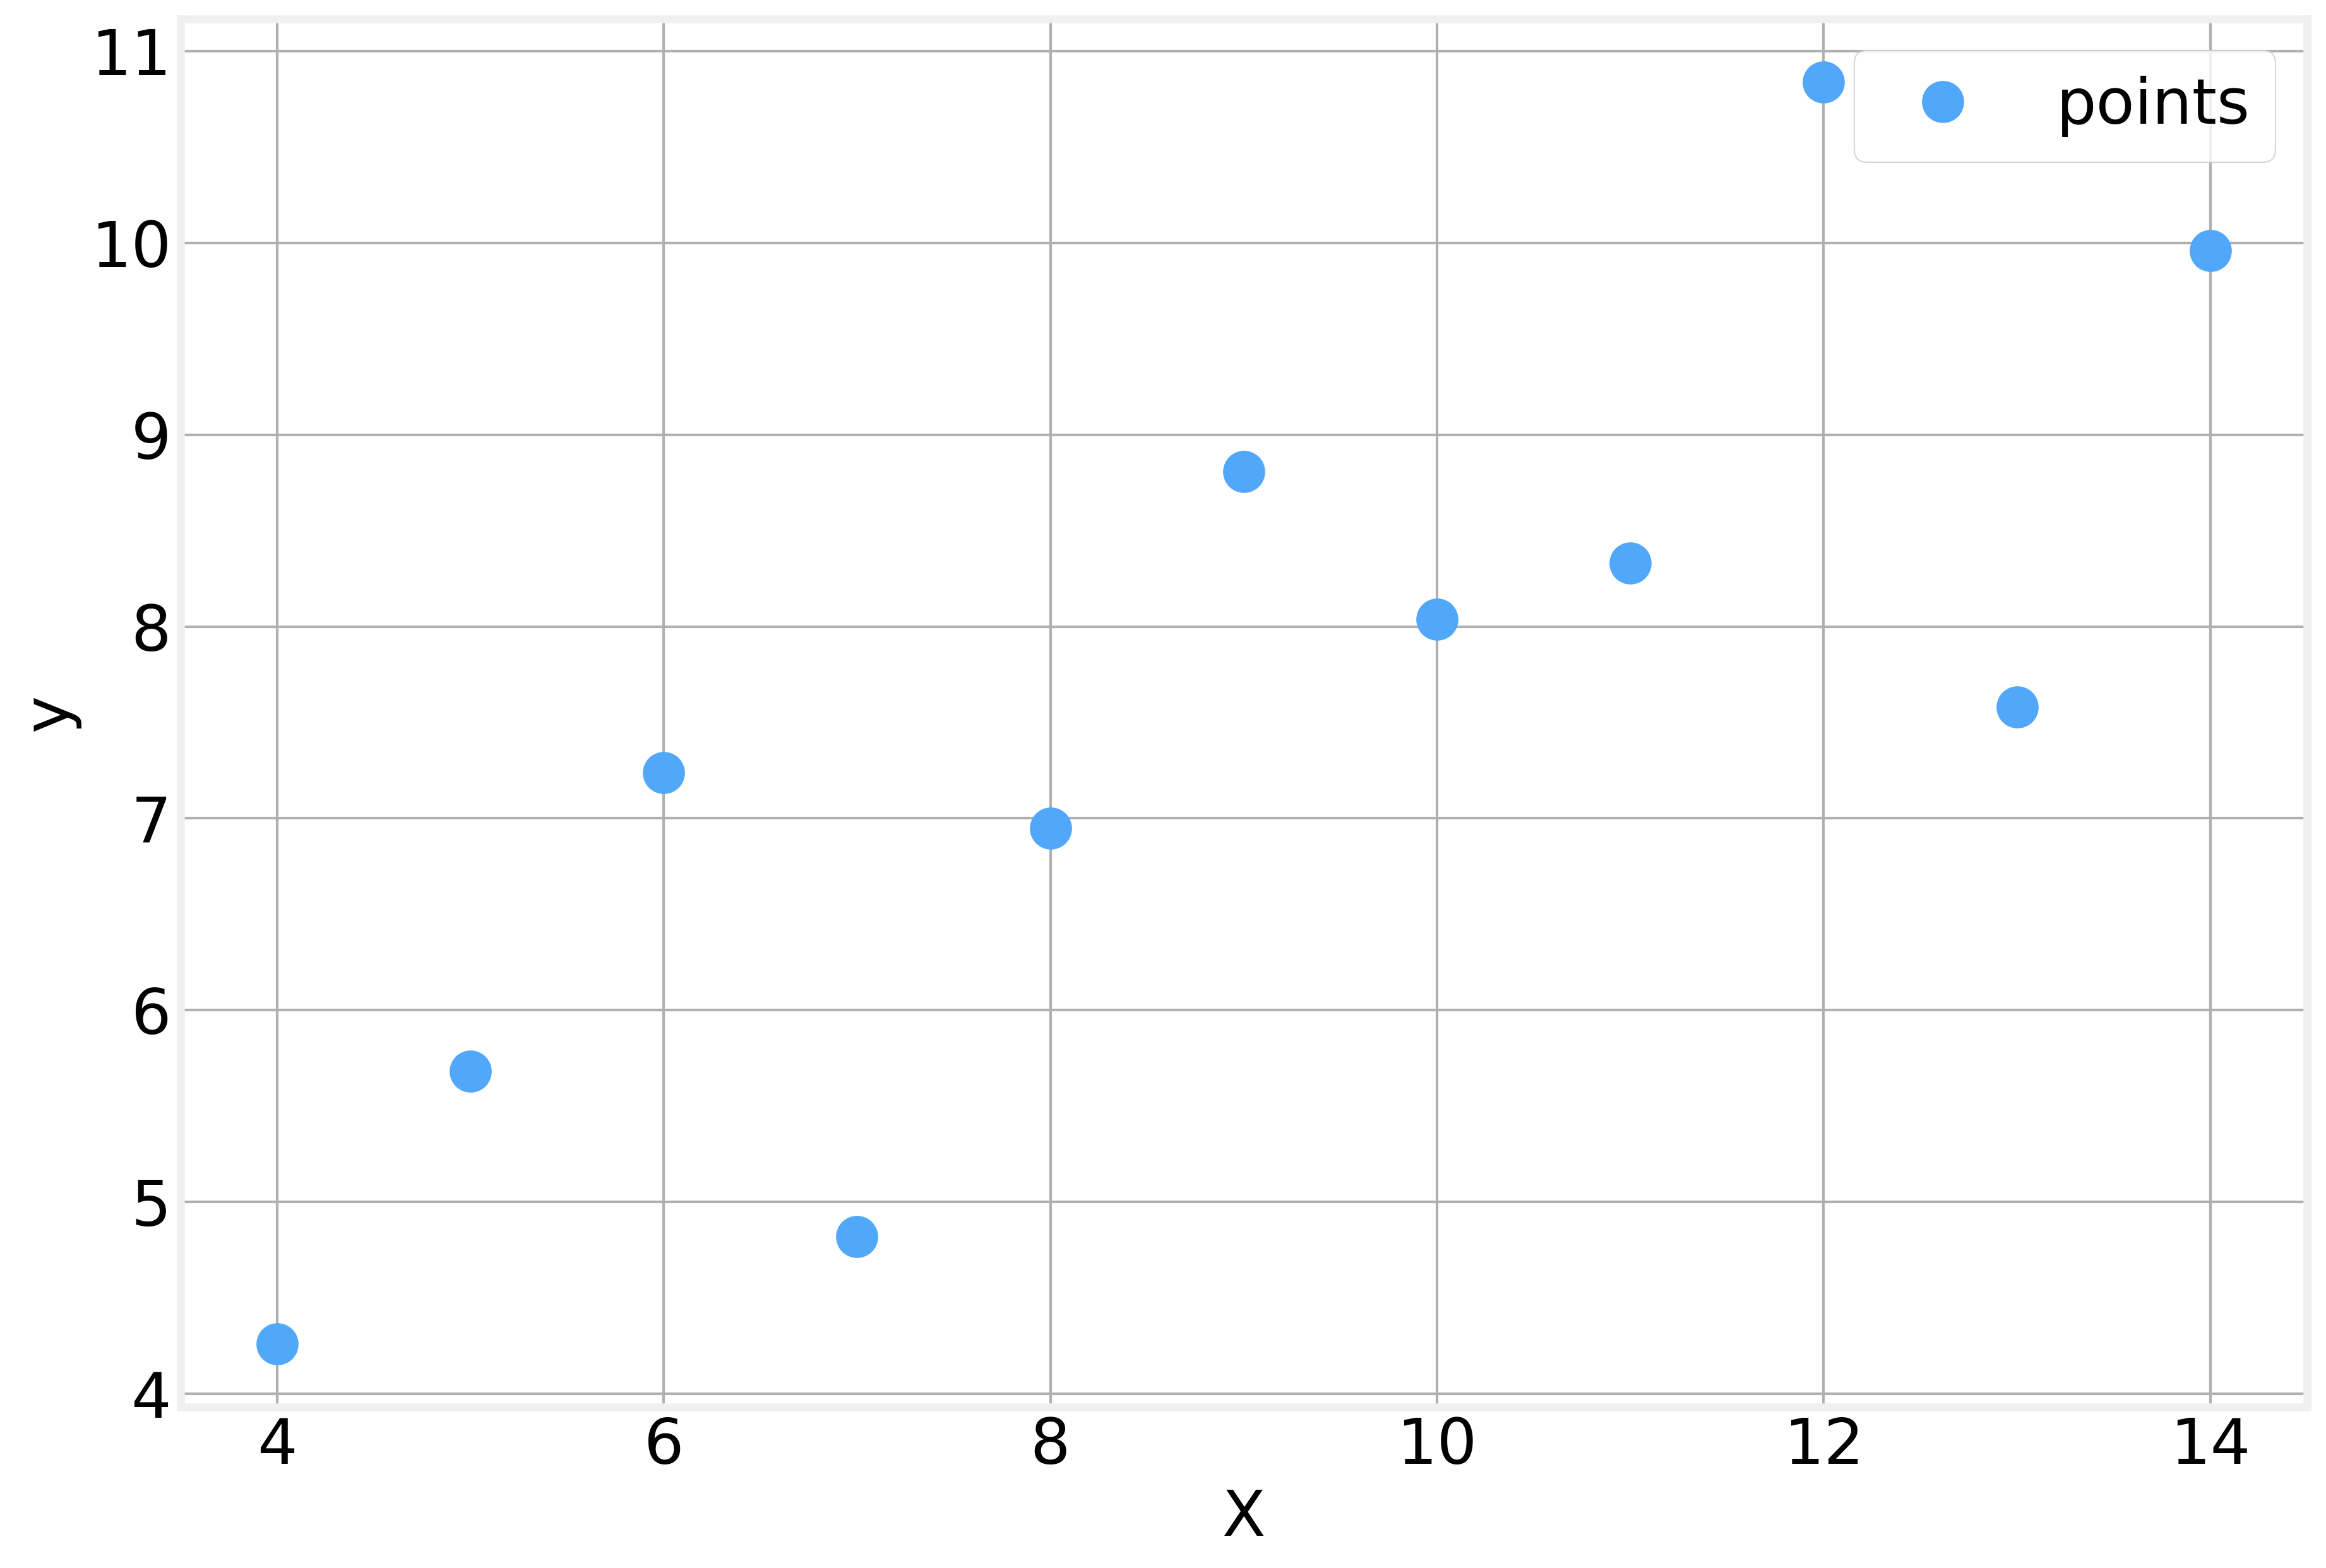

In [9]:
plt.plot(X, y, '.', markersize=30, label='points')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

Get matrix dimensions and add the bias column

In [10]:
M, N = X.shape
X = np.concatenate((np.ones((M, 1)), X), axis=1) # Add x0 for the bias/intercept

In [11]:
print(X)

[[ 1. 10.]
 [ 1.  8.]
 [ 1. 13.]
 [ 1.  9.]
 [ 1. 11.]
 [ 1. 14.]
 [ 1.  6.]
 [ 1.  4.]
 [ 1. 12.]
 [ 1.  7.]
 [ 1.  5.]]


Set the training parameters and initialize the weight matrix

In [12]:
alpha = 0.01 # Step size
epsilon = 0.12 # Maximum initial value

# Initial random weights chosen uniformly between +/- epsilon
weights = 2*np.random.rand(N+1, 1)*epsilon - epsilon
count = 0

## Training Procedure

In [13]:
oldJ = 0
err = 1

Js = []

while err > 1e-6:
    Hs = np.dot(X, weights)
    deltas = alpha/M*np.dot(X.T, (Hs-y))

    count += 1
    weights -= deltas

    J = np.sum(np.power(Hs-y, 2.))/(2*M)
    Js.append(J)
    err = np.abs(oldJ-J)
    oldJ = J
    
    if count % 100 == 0:
        print(count, J, err, weights.flatten())

print(count, J, err, weights.flatten())

100 1.016062079312162 0.0008512756515690612 [0.33714331 0.76377468]
200 0.93964903716122 0.0006846917399059294 [0.61186691 0.73657169]
300 0.8781890639016857 0.0005507061993756945 [0.85824858 0.71217509]
400 0.8287560324880023 0.00044293993976429746 [1.07921223 0.69029538]
500 0.7889964220432137 0.00035626217838202745 [1.27738012 0.67067289]
600 0.7570172660515031 0.00028654616202139493 [1.45510397 0.65307476]
700 0.7312960276766381 0.000230472691044592 [1.6144929  0.63729215]
800 0.7106081113442585 0.00018537209133373533 [1.75743843 0.62313775]
900 0.6939685593935335 0.0001490971103323968 [1.88563696 0.6104436 ]
1000 0.6805851579589711 0.0001199206857389612 [2.00060986 0.59905904]
1100 0.6698207194398905 9.645371956512605e-05 [2.10372155 0.58884897]
1200 0.6611627458150501 7.757894278814792e-05 [2.1961957  0.57969222]
1300 0.6541990284641138 6.239772184157832e-05 [2.27912973 0.57148013]
1400 0.6485980227963886 5.018727442207549e-05 [2.35350785 0.56411525]
1500 0.6440930633172868 4.036

Text(0, 0.5, 'Error')

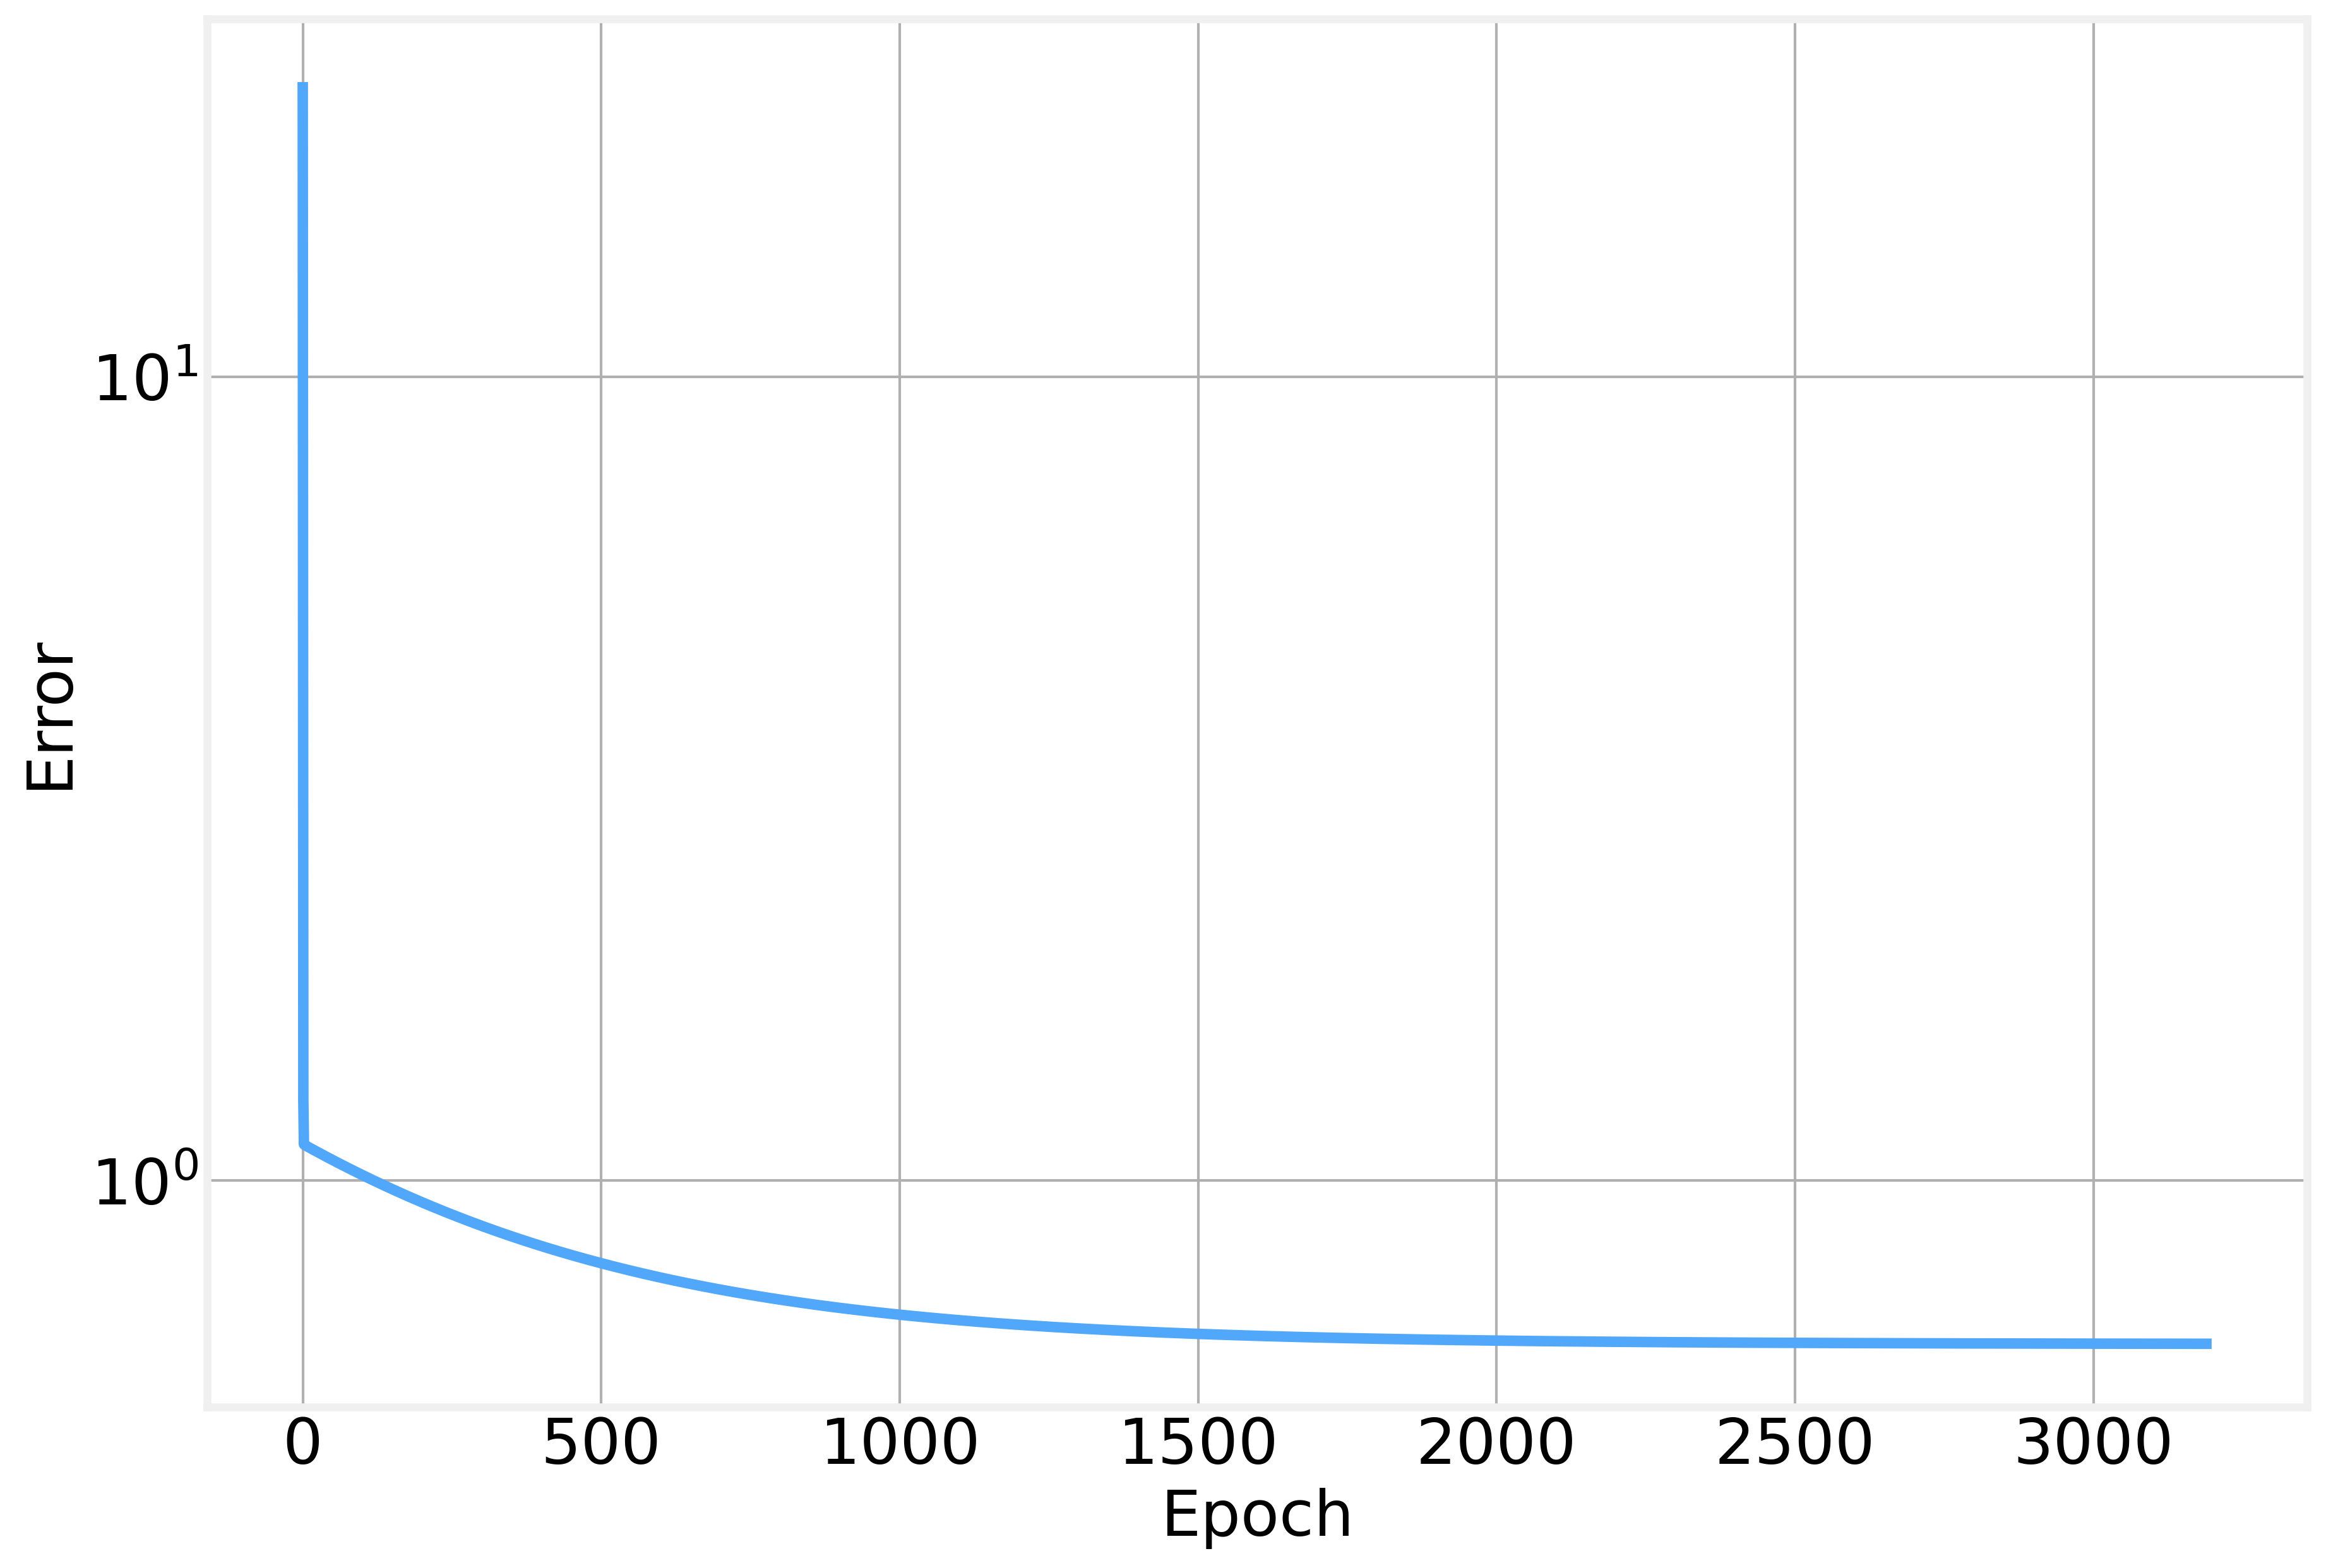

In [14]:
fig, ax = plt.subplots(1)
ax.semilogy(Js)
ax.set_xlabel('Epoch')
ax.set_ylabel('Error')

In [15]:
weights.flatten()

array([2.9089064 , 0.50911996])

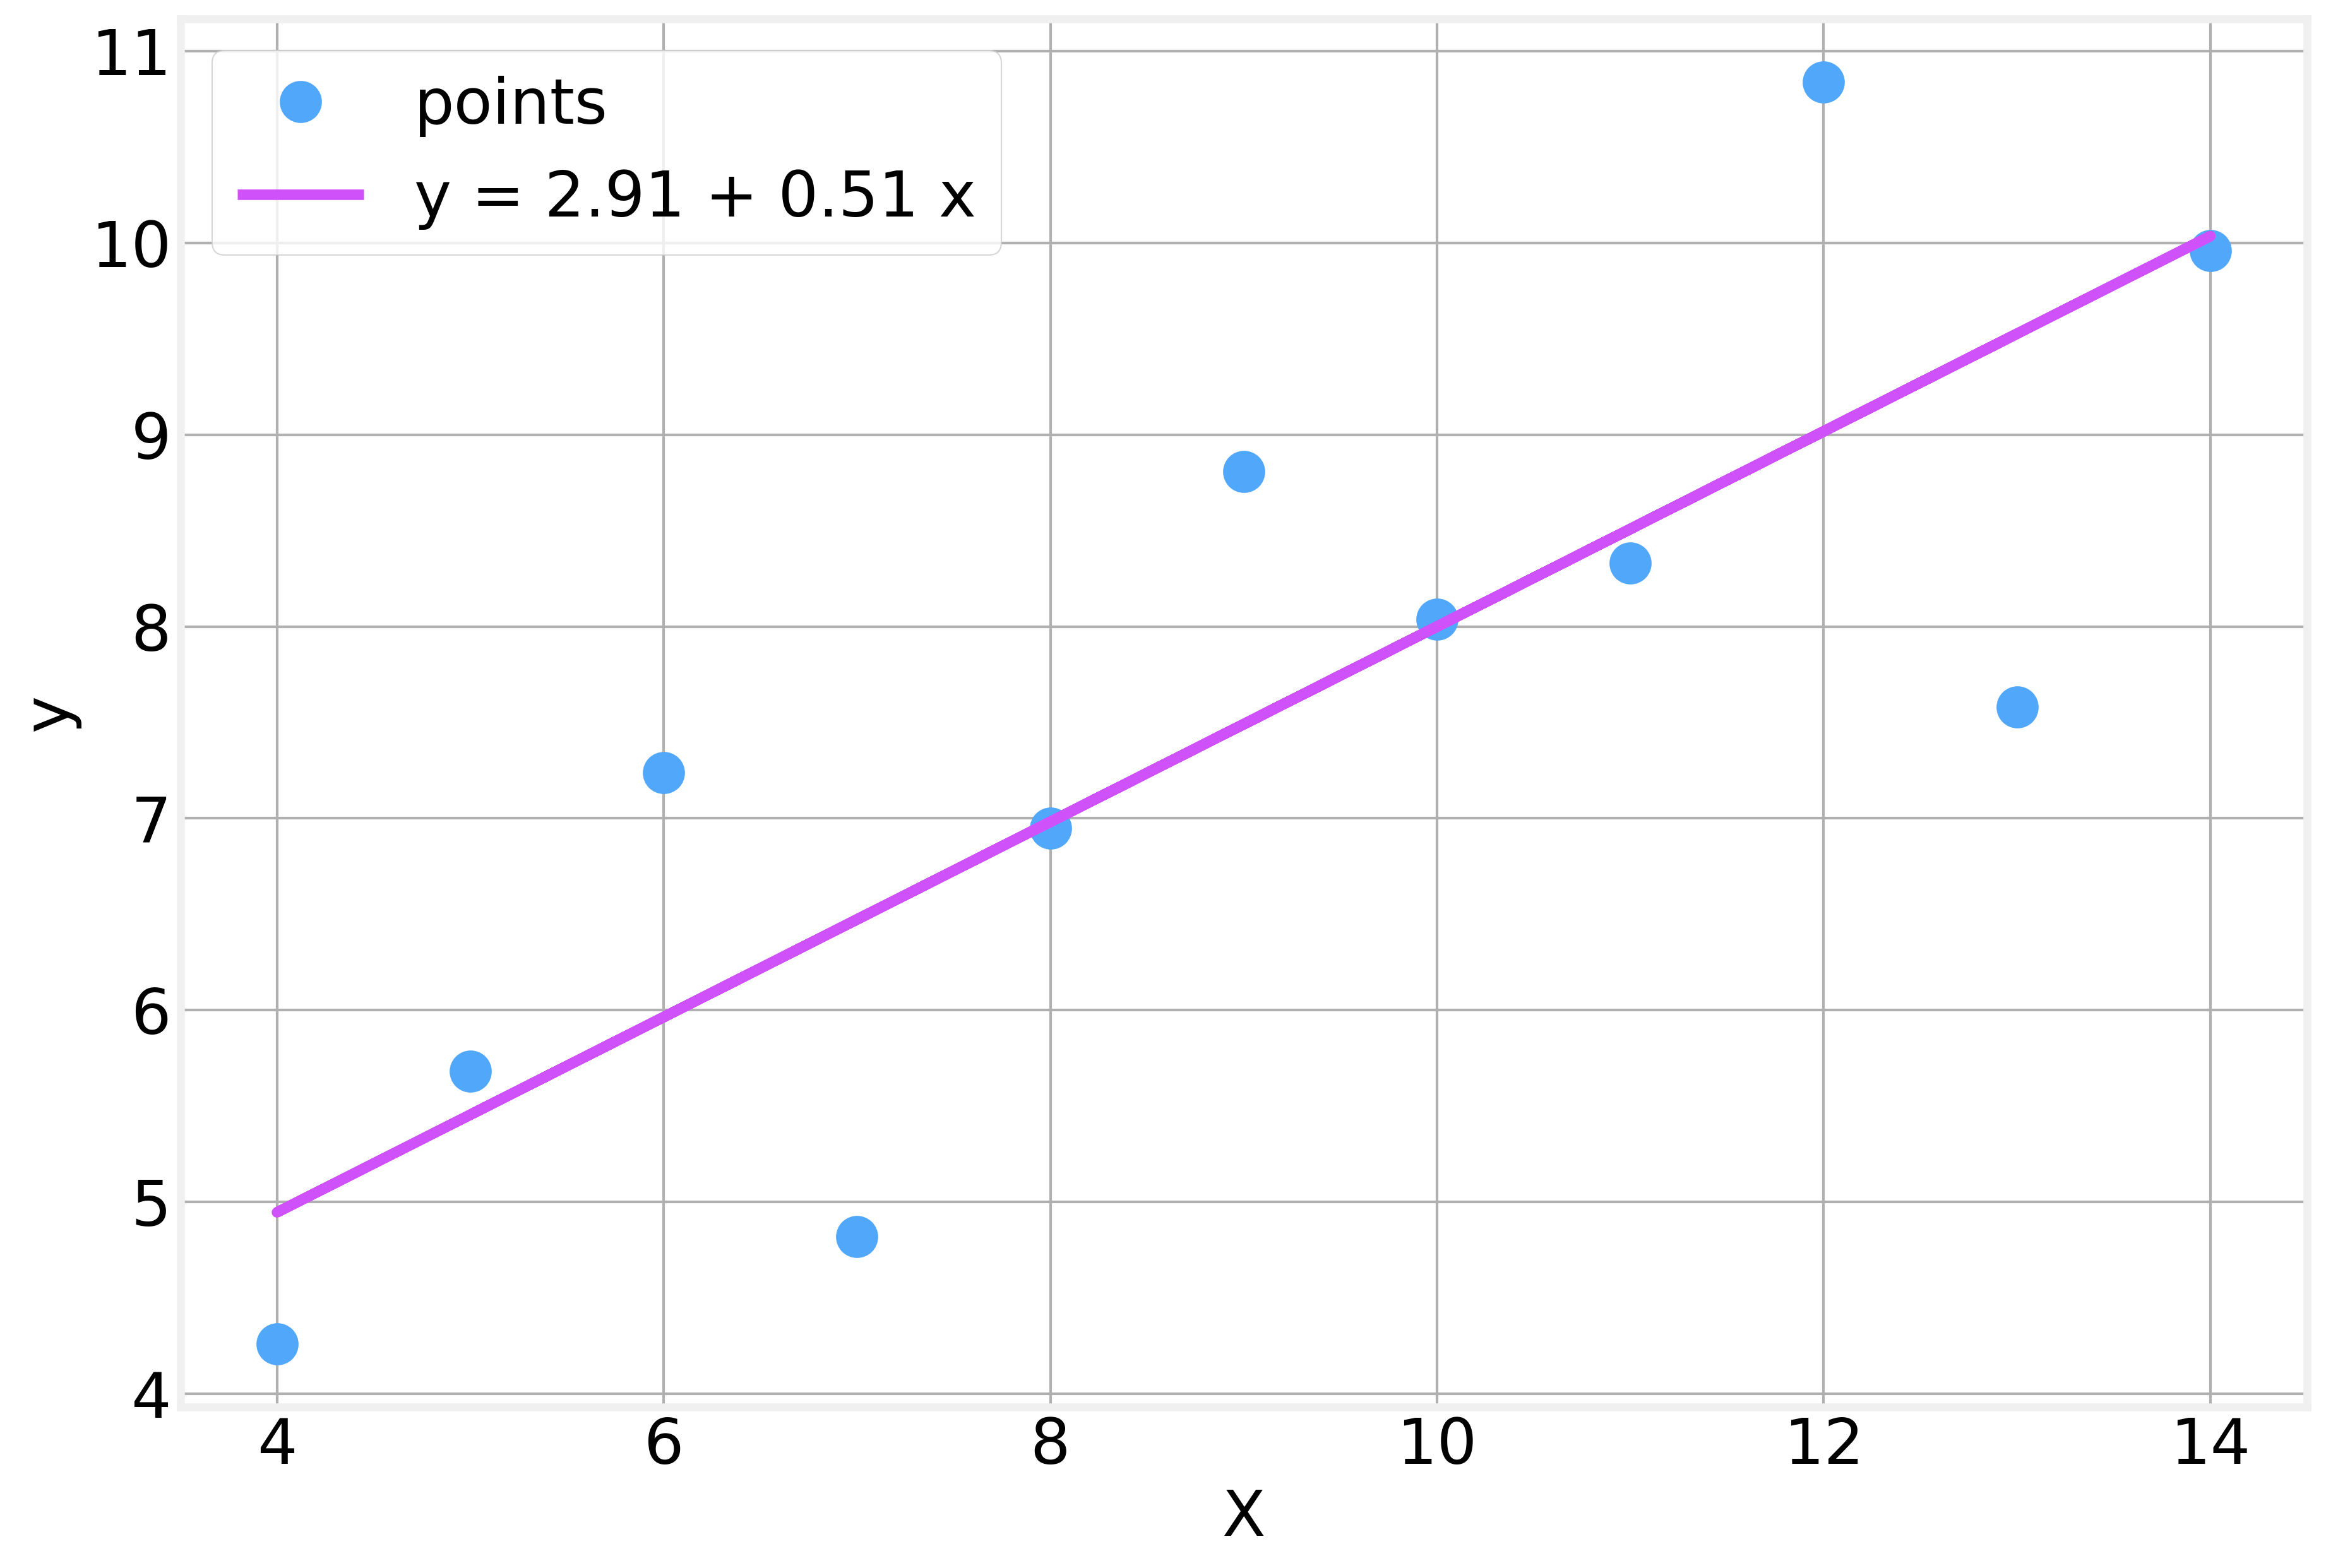

In [16]:
plt.plot(X.T[1], y, '.', markersize=30, label='points')
plt.plot(X.T[1], np.dot(X, weights.flatten()), '-',\
         label='y = %2.2f + %2.2f x' % tuple(weights.flatten()))
plt.xlabel('X')
plt.ylabel('y')
plt.legend()

<div style="width: 100%; overflow: hidden;">
     <img src="https://raw.githubusercontent.com/DataForScience/DeepLearning/master/data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>